# COGS 108 - Analysis of Tweet Sentiment Against Stock Prices

# Video

(PUT VIDEO LINK HERE)

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [_X_] YES - make available
* [  ] NO - keep private

# Names

- Kavin Raj
- Arnav Saxena
- Tiantong Wu
- Peike Xu
- Jing Yin Yip

# Abstract

In the era of information overload and digital communication, the interplay between social media and financial markets has become a subject of increasing interest. This study delves into the relationship between tweet sentiment and stock prices, aiming to uncover patterns and insights that can contribute to a deeper understanding of market dynamics.

We found and collected stock price and tweet data from Apple, Amazon, Tesla, Microsoft, and Google. Utilizing natural language processing (NLP) techniques, we analyze the vast datasets of tweets related to select stocks to extract sentiment scores. These scores were then compared with the corresponding stock prices over the course of 2015-2019. We graphed the sentiment scores with the price changes to visualize if there were any trends in the data. We utilized an OLS regression test and concluded that there weren’t any significant correlation between tweet sentiment and stock price changes.

# Research Question

How do opinionated tweets on Twitter as measured by a sentiment analysis model affect the stock prices of major tech companies, such as Apple, Amazon, Google, Microsoft, and Tesla within the time period of 2015 to 2019?

## Background and Prior Work

Twitter is a widely used social media platform for expressing many kinds of opinions, including those on certain companies. We believe that this may have an impact on the public perception of these companies, and we aim to investigate whether there is a connection between opinions expressed in social media and the actual stock prices of the companies in question. An example of was seen this back in 2021, when “a thread on r/WallStreetBets”  caused “more than 7,200% increase in GME—and a 689% run”<a name="cite_note-1"></a> <sup>[<a href="#cite_ref-1">1</a>]</sup> . This occurence informed us that there is a potential causal effect between opinions on social media and real-world stock prices; we think that this effect has a much greater scope than just this isolated case of GameStop stocks, and we are interested in seeing if this is a larger, more general phenomenon that can be applied to other time periods and companies.

When reading a research paper from the IOP conference series, we found a sentiment analysis model based on social media opinion on stock trading. It was remarked in the conclusion that “looking into correlation coefficient compared by number of days before and after the trading day, the result shows that correlation reaches to the peak on trading day then it gradually declines with the magnitude depending on the day length after trading day.” <a name="cite_note-2"></a> <sup>[<a href="#cite_ref-2">2</a>]</sup> This research is similar to what we aim to investigate, as the paper conducted their test on a Thai social media platform called Pantip, and discussed ten Thai companies. The paper provides more evidence that there is a causal link between social media sentiment and stock prices, and we are interested to see if a similar trend can be seen with tweets and tech companies' stocks in the US.

Our dataset of tweets was also used in a related paper "Speculator and Influencer Evaluation in Stock Market by Using Social Media" <a name="cite_note-3"></a> <sup>[<a href="#cite_ref-3">3</a>]</sup>, published in the 2020 IEEE International Conference on Big Data. This paper investigated how the tweets of certain users could possibly impact the stock prices of tech companies, which they grouped into 'speculators' and 'influencers', where the former are individuals who attempt to make a profit by insider trading or spreading misinformation, and the latter are individuals whose opinions of buying and selling stocks are well respected. The authors’ approach used machine learning models to identify these two groups based on their tweets. Although the paper does not find any correlations between the variables that they investigated, we thought that we could build on the existing results by looking at the entire dataset of tweets as a whole to see if any relationships emerge.

1. <a name="cite_note-1"></a> <sup>[<a href="#cite_ref-1">1</a>]</sup> Rechel, J. (28 Jan 2021) How social media moves markets: Analyzing GameStop (GME) using social listening data. Sprout Blog.
  <br> https://sproutsocial.com/insights/gamestop-stock-social-media

2. <a name="cite_note-2"></a> <sup>[<a href="#cite_ref-2">2</a>]</sup>  P Padhanarath et al 2019 IOP Conf. Ser.: Mater. Sci. Eng. 620 012094.
  <br>https://iopscience.iop.org/article/10.1088/1757-899X/620/1/012094/pdf

3. <a name="cite_note-3"></a> <sup>[<a href="#cite_ref-3">3</a>]</sup>  M. Doğan, Ö. Metin, E. Tek, S. Yumuşak and K. Öztoprak, "Speculator and Influencer Evaluation in Stock Market by Using Social Media," 2020 IEEE International Conference on Big Data (Big Data), Atlanta, GA, USA, 2020, pp. 4559-4566, doi: 10.1109/BigData50022.2020.9378170.
  <br>https://ieeexplore.ieee.org/document/9378170

# Hypothesis


Before answering our research question by investigating the available data, we think that there will be a positive correlation between a positive sentiment for a company and said company’s stock prices rising, as well as a positive correlation between a negative sentiment for a company and said company’s stock prices falling. This is due to the connection between a company’s public perception, how that is reflected in social media, and how it manifests in the stock market. If tweets about a company are mostly negative within a certain time period, we would expect to observe a decrease in stock prices, as both phenomena correspond to a decrease in public perception of the company. However, we also acknowledge that this relationship may not be as straightforward as is stated here, as there may be other confounds affecting each variable, such as Twitter only capturing the sentiment of a more vocal sample of people as compared to the rest of the population.

# Data

## Data overview

**Raw Datasets:**

Tweet Data:
- Dataset #1
  - Dataset Name: tweets_multiple
  - Link to the dataset: https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020?select=Tweet.csv
  - Number of observations: 3717964
  - Number of variables: 7
- The columns are as follows:
    - tweet_id: A unique identifier for each tweet.
    - writer: The username of the person who posted the tweet.
    - post_date: The timestamp of when the tweet was posted, likely in a Unix timestamp format.
    - body: The content of the tweet.
    - comment_num: The number of comments the tweet received.
    - retweet_num: The number of times the tweet was retweeted.
    - like_num: The number of likes the tweet received.


- Dataset #2
  - Dataset Name: id_to_company
  - Link to the dataset: https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020?select=Company_Tweet.csv
  - Number of observations: 4336445
  - Number of variables: 2
This dataset links tweets to specific companies based on their stock ticker symbols.
- The columns are as follows:
    - tweet_id: A unique identifier for each tweet.
    - ticker_symbol: The stock ticker symbol of a company, such as AAPL for Apple Inc.

The tweets_multiple dataset is a collection of tweets with various metrics, while the id_to_company dataset maps these tweets to specific companies using ticker symbols. 

Stock Data:

- Dataset #3
  - Dataset Name: APPLE_HISTORICAL
  - Link to the dataset: https://www.nasdaq.com/market-activity/stocks/aapl/historical
  - Number of observations: 1258
  - Number of variables: 6
- Dataset #4
  - Dataset Name: AMAZON_HISTORICAL
  - Link to the dataset: https://www.nasdaq.com/market-activity/stocks/amzn/historical
  - Number of observations: 1258
  - Number of variables: 6
- Dataset #5
  - Dataset Name: GOOGL_HISTORICAL
  - Link to the dataset: https://www.nasdaq.com/market-activity/stocks/googl/historical
  - Number of observations: 1258
  - Number of variables: 6
- Dataset #6
  - Dataset Name: GOOG_HISTORICAL
  - Link to the dataset: https://www.nasdaq.com/market-activity/stocks/goog/historical
  - Number of observations: 1258
  - Number of variables: 6
- Dataset #7
  - Dataset Name: MICROSOFT_HISTORICAL
  - Link to the dataset: https://www.nasdaq.com/market-activity/stocks/msft/historical
  - Number of observations: 1258
  - Number of variables: 6
- Dataset #8
  - Dataset Name: TESLA_HISTORICAL
  - Link to the dataset: https://www.nasdaq.com/market-activity/stocks/tsla/historical
  - Number of observations: 1258
  - Number of variables: 6
  
Datasets #3-8 are a record of stock prices of various tech companies on each day from January 2015 to December 2019. This time range was chosen to match the time range of our other dataset of tweets. In the dataset, the highest, lowest, and open/close prices of the stock are recorded as floats in each row, along with the corresponding day, which will be converted into a standard Timestamp format. These variables can provide insight into how a stock varies within a day, and comparing these across different days can lead to potential trends over time. The values of stock prices are a direct factual record, although further numerical processing may be needed later to reveal meaningful trends.

Further details of the specific steps taken to clean the datasets will be explained below.

## Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import math
import seaborn as sns
import datetime 
from datetime import timedelta 
import re
import statsmodels.api as sm

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

## Tweet Datasets

In [2]:
# Read dataset from csv files, containing tweets for all companies.
tweets_multiple = pd.read_csv('data/Tweet.csv')
id_to_company = pd.read_csv('data/Company_Tweet.csv')
# Join the two dataframes based on id
tweets_multiple = tweets_multiple.join(id_to_company.set_index('tweet_id'), on='tweet_id')
# Delete any missing values within the dataset
tweets_multiple.dropna(inplace=True)
# Drop irrelvant columns
tweets_multiple = tweets_multiple[['post_date', 'body', 'ticker_symbol']]

# Convert Date to datetime objects
tweets_multiple['Date'] = pd.to_datetime(tweets_multiple['post_date'], unit='s')

# Rename columns
tweets_multiple = tweets_multiple[['Date', 'body', 'ticker_symbol']]
tweets_multiple.columns = ['Date', 'Tweet', 'Stock Name']
tweets_multiple = tweets_multiple.sort_values(by=['Stock Name', 'Date'])
tweets_multiple = tweets_multiple.reset_index(drop=True)

# Check for row indices to separate companies
tweets_multiple["isStatusChanged"] = tweets_multiple["Stock Name"].shift(1, fill_value=tweets_multiple["Stock Name"].head(1)) != tweets_multiple["Stock Name"]
tweets_multiple.loc[tweets_multiple["isStatusChanged"] == True]

# Add new 'month' column
tweets_multiple['month'] = tweets_multiple['Date'].dt.to_period('M').astype(str)

# Create separate dataframes for individual companies
apple_tweets = tweets_multiple.iloc[:1414802].drop(columns=['isStatusChanged']).reset_index(drop=True)
amazon_tweets = tweets_multiple.iloc[1414802:2123994].drop(columns=['isStatusChanged']).reset_index(drop=True)
google_tweets = tweets_multiple.iloc[2123994:2833526].drop(columns=['isStatusChanged']).reset_index(drop=True)
microsoft_tweets = tweets_multiple.iloc[2833526:3207324].drop(columns=['isStatusChanged']).reset_index(drop=True)
tesla_tweets = tweets_multiple.iloc[3207324:].drop(columns=['isStatusChanged']).reset_index(drop=True)

We collected data from two csv files for tweets: Tweet.csv and Company_Tweet.csv. To begin the clean up process, we combine the two datasets into one large dataframe using the tweet_id variable. Tweets.csv contains all the tweets from every company, whilst Company_Tweets.csv contains stock ticker associated with each Tweet id. We then standardize the datetime for every row, and renamed every column. After standardizing every column, we split all the company specific tweets into new dataframes for their respective companies.

In [3]:
#Sentiment Analysis
sentiment = SentimentIntensityAnalyzer()

datasets = [apple_tweets, amazon_tweets, google_tweets, microsoft_tweets, tesla_tweets]

for df in datasets:
    # Create new column and calculate sentiment analysis score
    df['sentimental score'] = df['Tweet'].apply(sentiment.polarity_scores)

    compound_score = []
    for score in df['sentimental score']:
        compound_score.append(score['compound'])
    compound_score

    df['sentimental score'] = compound_score

apple_tweets = datasets[0]
amazon_tweets = datasets[1]
google_tweets = datasets[2]
microsoft_tweets = datasets[3]
tesla_tweets = datasets[4]

The sentiment analysis tool that we used is VADER. <br>
Hutto, C.J. & Gilbert, E.E. (2014). VADER: 
A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. 
Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [4]:
# Write data to file to avoid reading from large csv every time
apple_tweets.to_csv('data/Apple_Tweets.csv', index=False)
amazon_tweets.to_csv('data/Amazon_Tweets.csv', index=False)
google_tweets.to_csv('data/Google_Tweets.csv', index=False)
microsoft_tweets.to_csv('data/Microsoft_Tweets.csv', index=False)
tesla_tweets.to_csv('data/Tesla_Tweets.csv', index=False)

To save time, we save the new dataframes with the sentiment score into new CSV files named [COMPANY NAME]_Tweet.csv for future use. This is useful as it avoids data loading and sentiment analysis if the kernel is restarted. Below is an example of what this dataframe looks like.

In [5]:
#Example
apple_tweets

,Date,Tweet,Stock Name,month,sentimental score
0,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",AAPL,2015-01,0.0000
1,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,AAPL,2015-01,-0.8271
2,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL,2015-01,0.0000
3,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL,2015-01,0.0000
4,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL,2015-01,0.0000
...,...,...,...,...,...
1414797,2019-12-31 23:51:01,Imagine calling your broker-dealer and wanting...,AAPL,2019-12,0.4939
1414798,2019-12-31 23:51:06,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",AAPL,2019-12,0.7574
1414799,2019-12-31 23:53:03,That $SPY $SPX puuump in the last hour was the...,AAPL,2019-12,-0.3382
1414800,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,AAPL,2019-12,0.0000


**[COMPANY NAME]_Tweet.csv:**
- Variables:
    - Date: The date that the tweet was posted
    - Tweet: The content of the tweet
    - Stock Name: The company that the tweet is associated with
    - Month: The month and year that the tweet was posted
    - Sentimental score: The score outputted by the sentiment score analyzer

## Stock Datasets

In [6]:
# Read data from csv files containing stock data
apple_stock = pd.read_csv('data/APPLE_HISTORICAL.csv')
amazon_stock = pd.read_csv('data/AMAZON_HISTORICAL.csv')
googl_stock = pd.read_csv('data/GOOGL_HISTORICAL.csv')
goog_stock = pd.read_csv('data/GOOG_HISTORICAL.csv')
microsoft_stock = pd.read_csv('data/MICROSOFT_HISTORICAL.csv')
tesla_stock = pd.read_csv('data/TESLA_HISTORICAL.csv')

stocks = [apple_stock, amazon_stock, goog_stock, googl_stock, microsoft_stock, tesla_stock]

# Repeat data cleaning for each file
for i in range(len(stocks)):
    # Delete any missing values within the dataset
    stocks[i].dropna(inplace=True)
    # Convert the date entries into datetime objects
    stocks[i]['Date'] = pd.to_datetime(stocks[i].get('Date')).dt.date
    
    # Process all prices and convert into numerical data
    def nodollartofloat(series):
        series = series.str.strip('$')
        blank = []
        for i in series:
            i = float(i)
            blank = np.append(blank,i)
        return blank
    stocks[i]['End Day Price'] = nodollartofloat(stocks[i]['Close/Last'])
    stocks[i]['Beginning Day Price'] = nodollartofloat(stocks[i]['Open'])
    stocks[i]['Highest Price'] = nodollartofloat(stocks[i]['High'])
    stocks[i]['Lowest Price'] = nodollartofloat(stocks[i]['Low'])
    stocks[i] = stocks[i].drop(['Close/Last','Volume','Open','High','Low'], axis=1)

    # Restrict time range to relevant dates
    start_date = pd.to_datetime('2015-01-01').date()
    end_date = pd.to_datetime('2019-12-31').date()
    stocks[i] = stocks[i][(stocks[i]['Date'] >= start_date) & (stocks[i]['Date'] <= end_date)]
    stocks[i].reset_index(drop=True, inplace=True)
    stocks[i]["Raw Change in Price"] = stocks[i]["End Day Price"] - stocks[i]["Beginning Day Price"]
    stocks[i]["% Change in Price"] = (stocks[i]["End Day Price"] - stocks[i]["Beginning Day Price"])/stocks[i]["Beginning Day Price"]
    stocks[i]['Date'] = pd.to_datetime(stocks[i]['Date'])
    stocks[i]['month'] = stocks[i]['Date'].dt.to_period('M').astype(str)

apple_stock = stocks[0]
amazon_stock = stocks[1]
goog_stock = stocks[2]
googl_stock = stocks[3]
microsoft_stock = stocks[4]
tesla_stock =  stocks[5]

In [7]:
# Example
apple_stock

,Date,End Day Price,Beginning Day Price,Highest Price,Lowest Price,Raw Change in Price,% Change in Price,month
0,2019-12-31,73.4125,72.4825,73.4200,72.3800,0.9300,0.012831,2019-12
1,2019-12-30,72.8800,72.3650,73.1725,71.3050,0.5150,0.007117,2019-12
2,2019-12-27,72.4500,72.7800,73.4925,72.0300,-0.3300,-0.004534,2019-12
3,2019-12-26,72.4775,71.2050,72.4950,71.1750,1.2725,0.017871,2019-12
4,2019-12-24,71.0675,71.1725,71.2225,70.7299,-0.1050,-0.001475,2019-12
...,...,...,...,...,...,...,...,...
1253,2015-01-08,27.9725,27.3075,28.0375,27.1750,0.6650,0.024352,2015-01
1254,2015-01-07,26.9375,26.8000,27.0500,26.6737,0.1375,0.005131,2015-01
1255,2015-01-06,26.5650,26.6350,26.8575,26.1575,-0.0700,-0.002628,2015-01
1256,2015-01-05,26.5625,27.0725,27.1625,26.3525,-0.5100,-0.018838,2015-01


**Stock Data:**
- Date: The date of the day the stock prices was tracked
- End Day Price: The price for the stock at the end of the day
- Beginning Day Price: The price for the stock at the beginning of the day
- Highest Price: The highest price for that day
- Lowest Price: The lowest price recorded for that day
- Raw Change in Price: The price change from the start of the day to the end of the day
- % Change in price: The price change from the start of the day to the end represented as a percentage
- Month: The month and year that for the trading day (will be utilized for data visualization)

# Results

## Exploratory Data Analysis - Stock Prices

In [8]:
# Operation to get monthly difference
diff = lambda x: x['End Day Price']['first'] - x['Beginning Day Price']["last"]

#Calculate monthly price differences
month_price_differences = pd.concat(
    [   
        apple_stock.groupby("month").agg(['first', 'last']).apply(diff, axis=1).to_frame(),
        tesla_stock.groupby("month").agg(['first', 'last']).apply(diff, axis=1).to_frame(),
        microsoft_stock.groupby("month").agg(['first', 'last']).apply(diff, axis=1).to_frame(),
        goog_stock.groupby("month").agg(['first', 'last']).apply(diff, axis=1).to_frame(),
        googl_stock.groupby("month").agg(['first', 'last']).apply(diff, axis=1).to_frame(),
        amazon_stock.groupby("month").agg(['first', 'last']).apply(diff, axis=1).to_frame()
    ],
    join='outer',
    axis=1
).reset_index()
month_price_differences.columns = ["month", "apple", "amazon", "goog", "google", "microsoft", "tesla"]

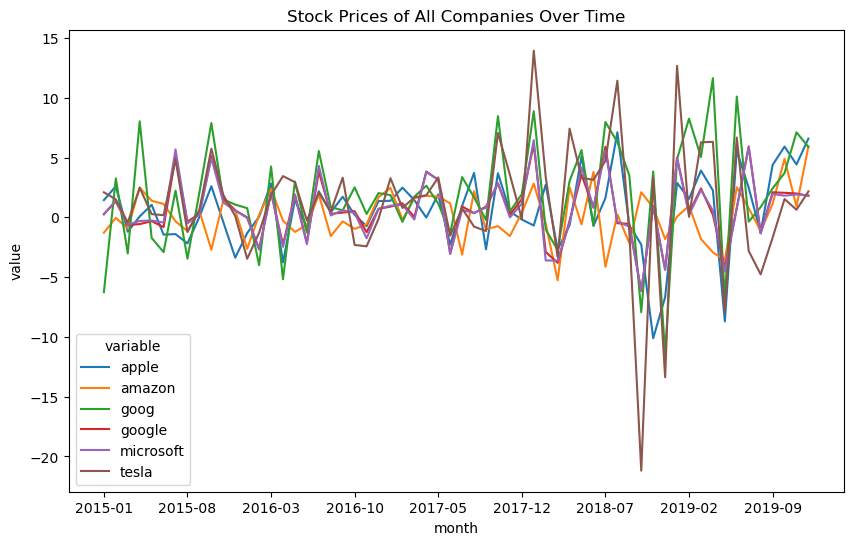

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='month', y='value', hue='variable', data=pd.melt(month_price_differences, ['month']))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(7))
plt.title('Stock Prices of All Companies Over Time')
plt.show()

This graph shows the trend of stock prices for all the tech companies over time. One interesting observation is that the stock prices seem to largely move together, which does make sense due to the companies all being within the tech sector. There are some ouliers at some points in time, but the groups of lines follow one another quite tightly. This may be reflective of bias within the dataset, where the subset of companies chosen may not be reflective of the behaviour of stock prices of companies in general.

## Exploratory Data Analysis - Sentiment Scores

In [10]:
# Create new dataframe with positive and negative sentiment scores separated
sentiment_df = pd.concat(
    [
        apple_tweets[(apple_tweets['sentimental score'] > 0)].groupby("month").mean(numeric_only=True),
        apple_tweets[(apple_tweets['sentimental score'] < 0)].groupby("month").mean(numeric_only=True),

        amazon_tweets[(amazon_tweets['sentimental score'] > 0)].groupby("month").mean(numeric_only=True),
        amazon_tweets[(amazon_tweets['sentimental score'] < 0)].groupby("month").mean(numeric_only=True),

        google_tweets[(google_tweets['sentimental score'] > 0)].groupby("month").mean(numeric_only=True),
        google_tweets[(google_tweets['sentimental score'] < 0)].groupby("month").mean(numeric_only=True),

        microsoft_tweets[(microsoft_tweets['sentimental score'] > 0)].groupby("month").mean(numeric_only=True),
        microsoft_tweets[(microsoft_tweets['sentimental score'] < 0)].groupby("month").mean(numeric_only=True),

        tesla_tweets[(tesla_tweets['sentimental score'] > 0)].groupby("month").mean(numeric_only=True),
        tesla_tweets[(tesla_tweets['sentimental score'] < 0)].groupby("month").mean(numeric_only=True)
    ],
    join="outer",
    axis=1
).reset_index()
sentiment_df.columns = ["month", "apple_pos", "apple_neg", "amazon_pos", "amazon_neg", "google_pos", 
                        "google_neg", "microsoft_pos", "microsoft_neg", "tesla_pos", "tesla_neg"]
for i in ["apple", "amazon", "google", "microsoft", "tesla"]:
    sentiment_df[f"{i}_neg_abs"] = sentiment_df[f"{i}_neg"].abs()

In [11]:
sentiment_df.head()

,month,apple_pos,apple_neg,amazon_pos,amazon_neg,google_pos,google_neg,microsoft_pos,microsoft_neg,tesla_pos,tesla_neg,apple_neg_abs,amazon_neg_abs,google_neg_abs,microsoft_neg_abs,tesla_neg_abs
0,2015-01,0.495673,-0.362417,0.440573,-0.400083,0.535074,-0.374469,0.464027,-0.379019,0.475574,-0.381779,0.362417,0.400083,0.374469,0.379019,0.381779
1,2015-02,0.504098,-0.350698,0.428906,-0.374472,0.552741,-0.365438,0.452518,-0.346676,0.468807,-0.396279,0.350698,0.374472,0.365438,0.346676,0.396279
2,2015-03,0.548971,-0.370424,0.406658,-0.368205,0.527521,-0.361650,0.433608,-0.394009,0.448320,-0.386569,0.370424,0.368205,0.361650,0.394009,0.386569
3,2015-04,0.504939,-0.358368,0.429681,-0.357930,0.538211,-0.369693,0.455612,-0.352792,0.470803,-0.376241,0.358368,0.357930,0.369693,0.352792,0.376241
4,2015-05,0.453326,-0.393544,0.407685,-0.384498,0.432431,-0.379945,0.454605,-0.326533,0.446074,-0.397356,0.393544,0.384498,0.379945,0.326533,0.397356


Sentiment_df is a merged dataframe with the average sentiment score per month of the positive and negative tweets (tweets that have a non-zero sentiment score), for each recorded stock.
The absolute value is also taken for the negative tweets, since we care about the magnitude of the sentiment score as we already know which score is positive and negative based on the column.

In [12]:
sentiment_df_std = (sentiment_df-sentiment_df.mean(numeric_only=True))/sentiment_df.std(numeric_only=True)
sentiment_df_std["month"] = sentiment_df["month"]

sentiment_df_std normalizes the sentiment scores so that we can compare differences in sentiment more accurately. 

In [13]:
def plot_pos_neg(data, stock):
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    sns.scatterplot(data=data, x="month", y=f"{stock}_pos")
    sns.scatterplot(data=data, x="month", y=f"{stock}_neg_abs")
    plt.xlabel('Time') 
    plt.ylabel('Average Sentiment Z-Score')
    plt.title(stock)
    plt.legend(["Positive", "Negative"])

    # Customize x-axis ticks to show only years in the middle
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    plt.show()

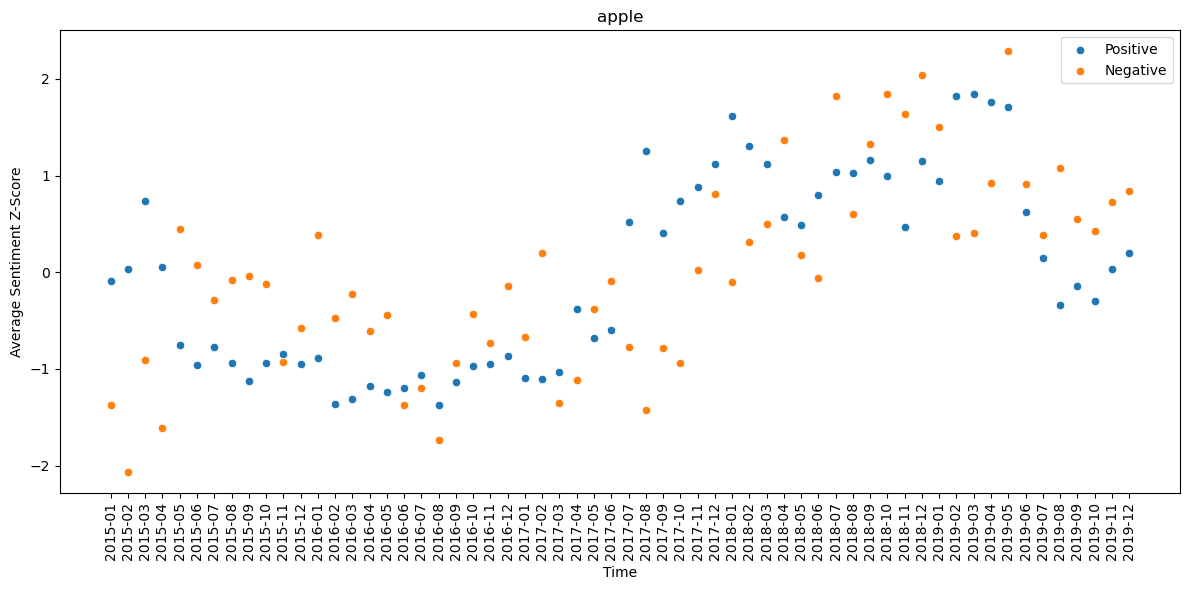

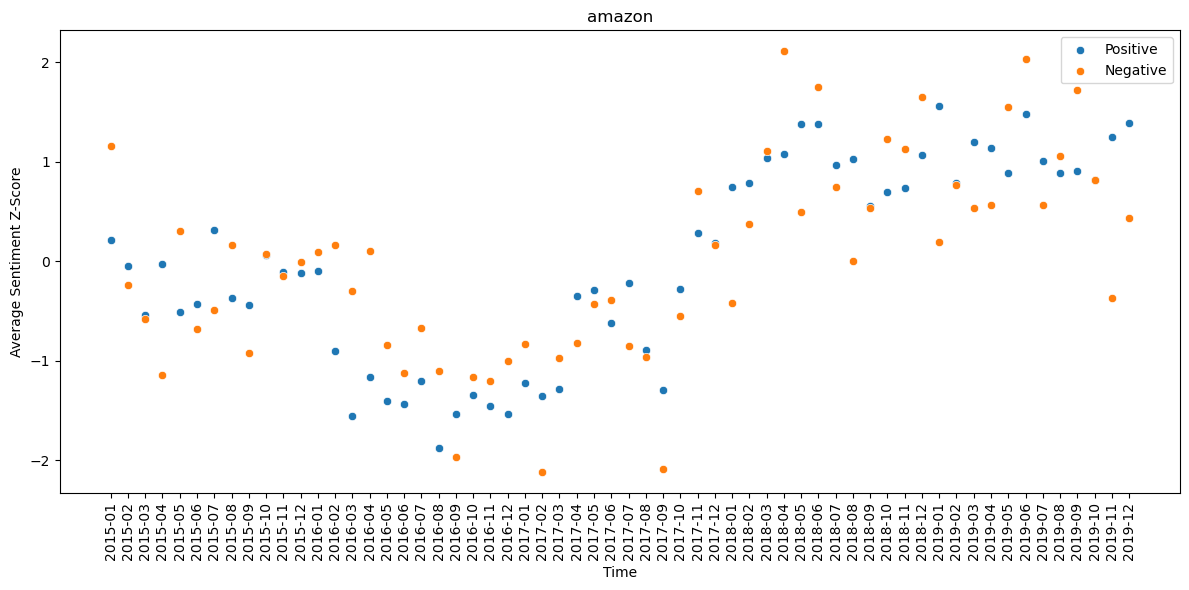

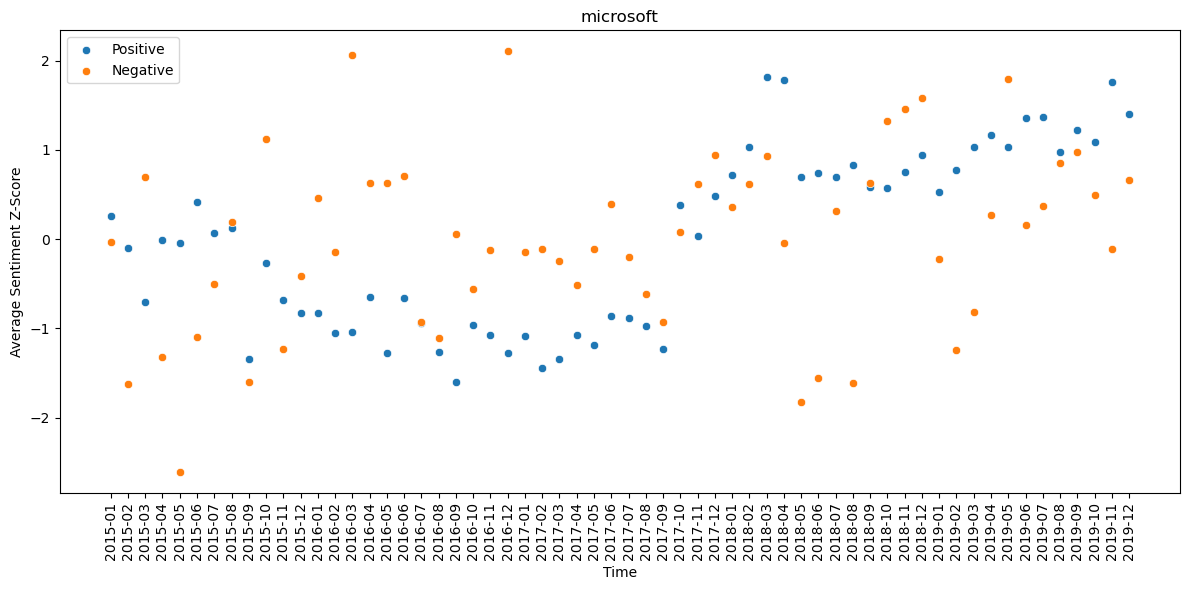

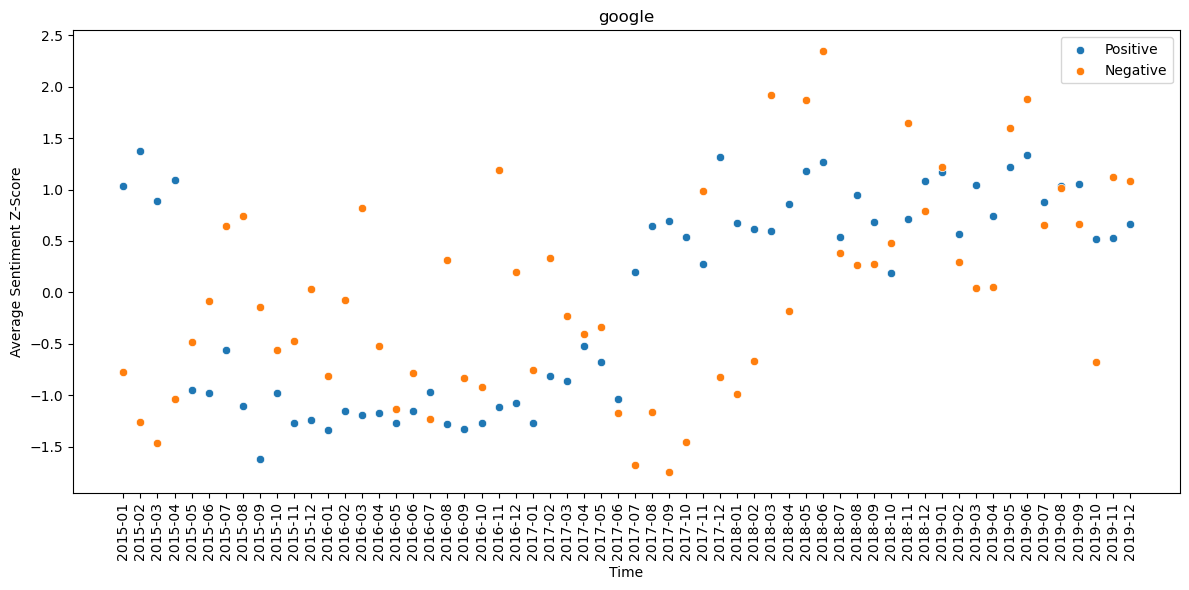

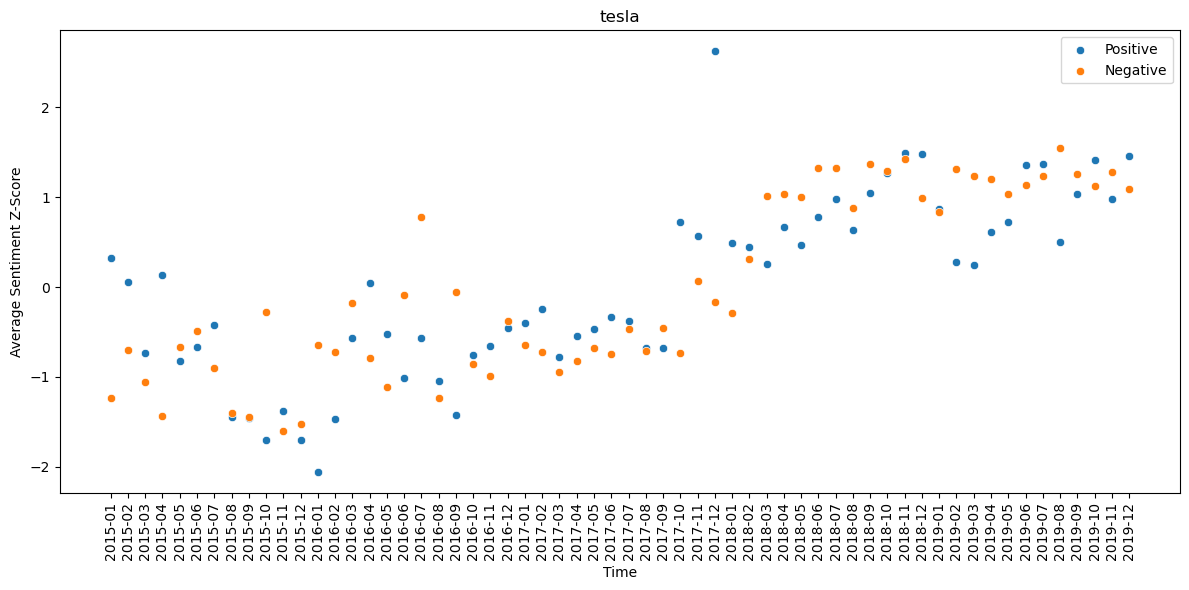

In [14]:
plot_pos_neg(sentiment_df_std, "apple")
plot_pos_neg(sentiment_df_std, "amazon")
plot_pos_neg(sentiment_df_std, "microsoft")
plot_pos_neg(sentiment_df_std, "google")
plot_pos_neg(sentiment_df_std, "tesla")

There appears to be a similar trend between positive and negative sentiment over time. Months with larger positive sentiment also have a larger negative sentiment, and months with a lower positive sentiment tend to have a smaller negative sentiment as well. This is fairly consistent across all companies, although there are time periods where there is a noticeable difference between positive and negative sentiment.

## Exploratory Data Analysis - Correlation

In [15]:
def find_max(row, stock):
    if row[f"{stock}_pos"] > row[f"{stock}_neg_abs"]:
        return row[f"{stock}_pos"]
    return row[f"{stock}_neg"]

def plot_max(stock):
    x = sentiment_df[f'{stock}_pos']
    y = month_price_differences[f'{stock}']
    sns.regplot(x=x,y=y)
    plt.title(f"{stock} stock vs Month Price Difference")
    plt.ylabel("Month Price Difference")
    plt.xlabel("Max magnitude of (Positive sentiment, Negative sentiment)")
    plt.show()

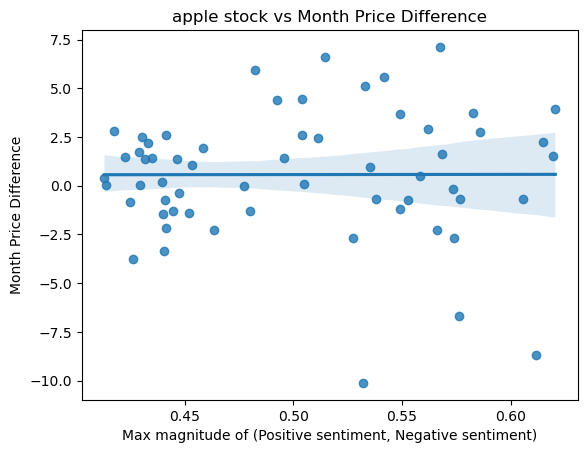

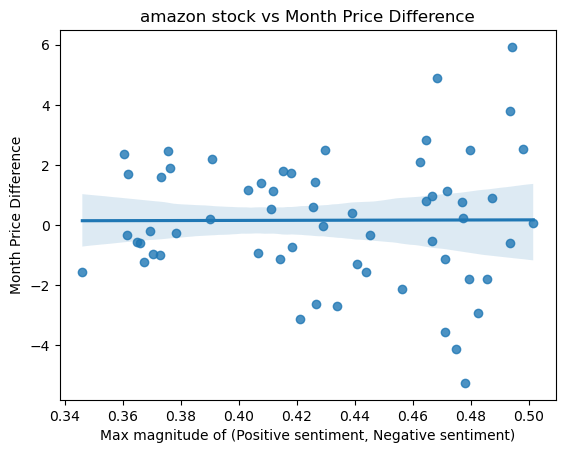

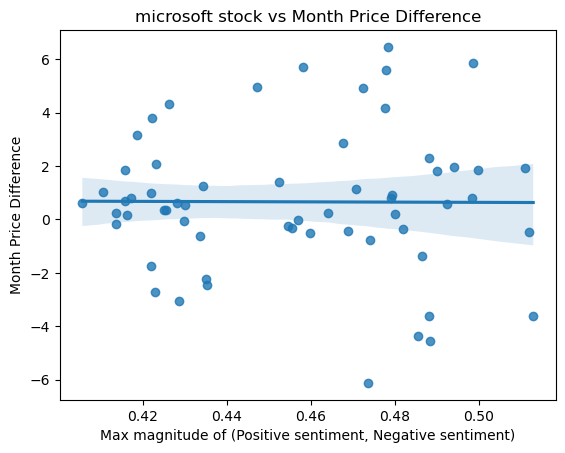

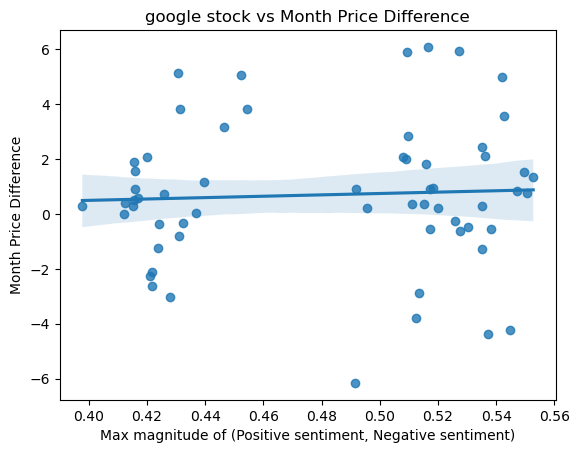

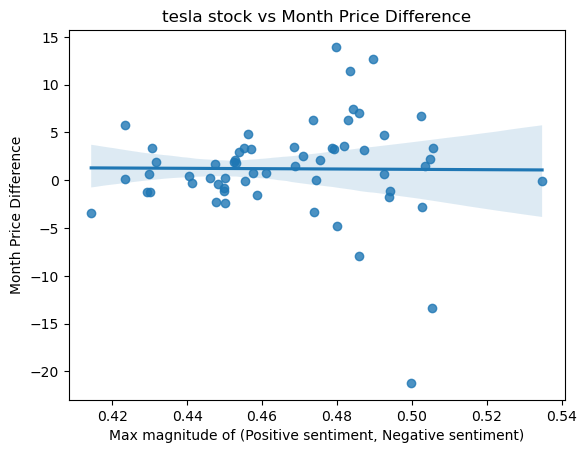

In [16]:
plot_max('apple')
plot_max('amazon')
plot_max('microsoft')
plot_max('google')
plot_max('tesla')

For these graphs, we only consider the positive sentiment, as there is a strong association between the positive and negative sentiment scores, as shown previously.
We can see that there isn't an strong upwards trend as we initially thought, and that many plot points are very scattered. This could be because the scaling of the graph wasn't clear, but the more likely reason was that the trend wasn't strong to begin with. We will do more analysis later on to get a better understanding.

## First Analysis You Did - Give it a better title

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## Second Analysis You Did - Give it a better title

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## ETC AD NASEUM

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

In our project, there exist several ethical and privacy concerns. First of all, to collect users' twitter posts might be a violation of privacy. Although Twitter posts are publicly posted, people might not want to have their posts be a part of a project or an experiment. Thus, we handled this privacy issue by anonymizing all data from the users. In addition, there exists a potential bias that it is hard to judge a human written post as simply positive or negative. Some posts might contain emotions that are complex. People might be confused about the trend of a stock's price, or hard to determine whether they are clearly for or clearly against a change in the stock prices. Also, we should be able to accurately interpret the information contained in a twitter post. To handle this issue, we present our findings as transparently as possible. Also, since our data set is relatively large(there are thousands of twitter posts), we could clearly identify the ones who are less complex or have clear stances, and analyze the correlation between those posts and the stock prices. To address this issue, we excluded all the users’ tweets with 0 sentiment scores according to our model.

One of the concerns is that our data relies heavily on the judgements of the sentiment analysis model we imported. It is important to use these models with caution, be aware of their potential shortcomings, and complement them with human judgment and context whenever possible to ensure the most accurate and reliable analysis of sentiment in the data. Also, since we are answering the research question of how do opinionated tweets on Twitter as measured by a sentiment analysis model affect the stock prices of major tech companies, such as Apple, Amazon, Google, and Tesla, we are aware that any conclusions we made according to our analysis might be misused by audience to falsely interpret the market. Therefore, we ensure the transparency of our methodology, and we included warnings to potential investors to address that our findings are based on analysis that might carry biases.

# Discussion and Conclusion

In our data analysis, we attempted to fit the variables to a linear model as well as a 2nd order model, but neither was a good fit for our data, as we failed to find any significant relationships between the sentiment of stocks as measured by tweets and the actual stock prices of the same time. This finding does not match our initial hypothesis, where we predicted that there would be a positive relationship between the two main variables due to the intuitive causal link between them.

The two most probable confounds that caused us to be unable to find a significant relationship between the sentiment of stocks and stock prices were an unbalanced/noisy dataset; and other possible relationships that we didn't end up conducting in our analysis.

In our dataset of tweets, we found that a significant portion of them were classified as having neither positive or sentiment. In our analysis, we ultimately discarded these "neutral" tweets, as they had no numerical contribution to our data, but it is worth considering that this was a significant result in itself. One possible explanation is that our sentiment analysis model did not accurately capture the true sentiment of the individuals making the tweets, or that there was not much positive or negative sentiment towards the stock in the tweet in reality. Furthermore, using the dataset of tweets is a biased sample in the first place, as it is a convenient sample, and suffers from the streetlight effect; where it is a relatively easy dataset to obtain, but is probably not reflective of the actual sentiment of the general population, as it over-represents individuals who are more vocal about their opinions on social media. Our dataset of stocks also suffers from bias, as it only contains a rather small sample of related companies, which is not reflective of stock price fluctuations of companies in general.

During our analyses, we were unable to find a good fit for the mathematical relationship between sentiment and stock prices, but we do want to point out some more potential relationships that could be explored in the future, that we did not do, as they are outside of this project's scope. Firstly, the trend of stock price could have periodicity, and could be deconstructed using Fourier transformations. Previous studies have been conducted regarding the potential periodicity of stock prices <a name="cite_note-1"></a> <sup>[<a href="#cite_ref-1">1</a>]</sup> <a name="cite_note-2"></a> <sup>[<a href="#cite_ref-2">2</a>]</sup>, but they have either been inconclusive, or drawn the conclusion that periodicity exists within the time period of a day. Another possible relationship that the variables could have is a non-Markovian process, where the stock price at any given time could depend on the sentiment of the relative past, rather than the sentiment right at the relative present.

1. <a name="cite_note-1"></a> <sup>[<a href="#cite_ref-1">1</a>]</sup> E Oliveira, Maria Joao Arantes, "High Frequency Periodicity in Stock Trades" (2015). CUNY Academic Works.
  <br> https://academicworks.cuny.edu/cc_etds_theses/543

2. <a name="cite_note-2"></a> <sup>[<a href="#cite_ref-2">2</a>]</sup>  Osaka, M. (2019) A Mathematical Model Reveals That Both Randomness and Periodicity Are Essential for Sustainable Fluctuations in Stock Prices. Applied Mathematics, 10, 383-396. doi: 10.4236/am.2019.106028.
  <br> https://www.scirp.org/journal/paperinformation?paperid=93038


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.